In [182]:
import pandas as pd     # Impoprting the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')      # Stopwords for preprocessing
nltk.download('punkt')          # Tokenizer for text processing

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sagarbanjara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sagarbanjara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [184]:
df = pd.read_csv("/Users/sagarbanjara/Downloads/reviews.csv")     #loading the csv file

In [186]:
df

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [190]:
df.shape

(1597, 27)

In [192]:
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [194]:
df.dropna(axis=1)    # removing columns that have any nan values

,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.sourceURLs,reviews.text
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...
...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,alexavoiceremoteforamazonfiretvfiretvstick/b00...,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,alexavoiceremoteforamazonfiretvfiretvstick/b00...,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,alexavoiceremoteforamazonfiretvfiretvstick/b00...,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to..."
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,alexavoiceremoteforamazonfiretvfiretvstick/b00...,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...


In [196]:
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [198]:
df = df.dropna(axis=1)
print(df.isnull().sum())   #remaining column after removing the nan values

id                    0
asins                 0
brand                 0
categories            0
dateAdded             0
dateUpdated           0
keys                  0
name                  0
prices                0
reviews.sourceURLs    0
reviews.text          0
dtype: int64


In [200]:
df['reviews.text'].head()

0    I initially had trouble deciding between the p...
1    Allow me to preface this with a little history...
2    I am enjoying it so far. Great for reading. Ha...
3    I bought one of the first Paperwhites and have...
4    I have to say upfront - I don't like coroporat...
Name: reviews.text, dtype: object

In [202]:
reviews = df['reviews.text'][2]

tokens = nltk.word_tokenize(reviews)   #tocanization
tokens[:30]

['I',
 'am',
 'enjoying',
 'it',
 'so',
 'far',
 '.',
 'Great',
 'for',
 'reading',
 '.',
 'Had',
 'the',
 'original',
 'Fire',
 'since',
 '2012',
 '.',
 'The',
 'Fire',
 'used',
 'to',
 'make',
 'my',
 'eyes',
 'hurt',
 'if',
 'I',
 'read',
 'too']

In [204]:
from nltk.corpus import stopwords


In [206]:
reviews

"I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet."

In [208]:
df['reviews.text'].head()

0    I initially had trouble deciding between the p...
1    Allow me to preface this with a little history...
2    I am enjoying it so far. Great for reading. Ha...
3    I bought one of the first Paperwhites and have...
4    I have to say upfront - I don't like coroporat...
Name: reviews.text, dtype: object

In [210]:
import re


In [212]:
custom_stopwords = {"the", "is", "and", "in", "on", "it", "this", "of", "for", "to", "with"}    #defining the keywords delete these from the reviews

def preprocess_text(text):     #test pre prossessing
    text = re.sub(r'\W+', ' ', text)     #Removing characters
    text = text.lower()       # converting to lowercase
    tokens = text.split()  # tokenizeing
    tokens = [word for word in tokens if word not in custom_stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['reviews.text'].apply(preprocess_text)

/var/folders/gl/k598yvcn0159l10lft8q97p80000gn/T/ipykernel_3641/3679637946.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['reviews.text'].apply(preprocess_text)


In [214]:
df['cleaned_text'].head()

0    i initially had trouble deciding between paper...
1    allow me preface a little history i am was a c...
2    i am enjoying so far great reading had origina...
3    i bought one first paperwhites have been very ...
4    i have say upfront i don t like coroporate her...
Name: cleaned_text, dtype: object

In [216]:
reviews = df['cleaned_text'][66]   #checking the index 66 after tocanization and cleaning

tokens = nltk.word_tokenize(reviews)
tokens[:30]

['i',
 'am',
 'not',
 'a',
 'casual',
 'user',
 'demand',
 'content',
 'devices',
 'having',
 'tried',
 'smart',
 'tv',
 's',
 'from',
 '3',
 'brands',
 'smart',
 'dvd',
 'bluray',
 'players',
 'apple',
 'tv',
 'wdtv',
 'htpc',
 'chromecast',
 'too',
 'many',
 'other',
 'competing']

In [218]:
def infer_sentiment_from_keywords(text):
    positive_keywords = ["great", "excellent", "amazing", "good", "love", "best", "wonderful", "perfect"]
    negative_keywords = ["bad", "poor", "terrible", "hate", "worst", "awful", "horrible"]
    
    text = text.lower()  # Normalize text to lowercase
    
    if any(keyword in text for keyword in positive_keywords):
        return "Positive"
    elif any(keyword in text for keyword in negative_keywords):
        return "Negative"
    else:
        return "Neutral"


df['sentiment'] = df['reviews.text'].apply(infer_sentiment_from_keywords)

# the first few rows with the inferred sentiments
df[['reviews.text', 'sentiment']].head()

/var/folders/gl/k598yvcn0159l10lft8q97p80000gn/T/ipykernel_3641/2789800038.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['reviews.text'].apply(infer_sentiment_from_keywords)


,reviews.text,sentiment
0,I initially had trouble deciding between the p...,Positive
1,Allow me to preface this with a little history...,Positive
2,I am enjoying it so far. Great for reading. Ha...,Positive
3,I bought one of the first Paperwhites and have...,Positive
4,I have to say upfront - I don't like coroporat...,Positive


In [220]:
df[['reviews.text', 'sentiment']].tail()

,reviews.text,sentiment
1592,This is not the same remote that I got for my ...,Neutral
1593,I have had to change the batteries in this rem...,Negative
1594,"Remote did not activate, nor did it connect to...",Negative
1595,It does the job but is super over priced. I fe...,Neutral
1596,I ordered this item to replace the one that no...,Neutral


In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
X.shape

(1597, 5000)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #train and testing the model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#chosing the metrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [227]:
accuracy, precision, recall, f1

(0.865625, 0.8538281762519133, 0.865625, 0.8492083371633422)

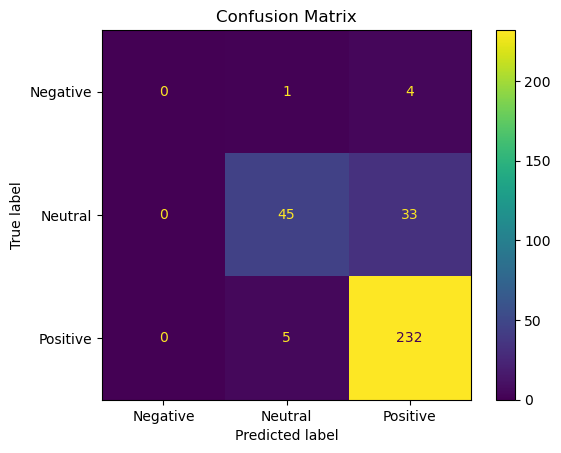

In [230]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

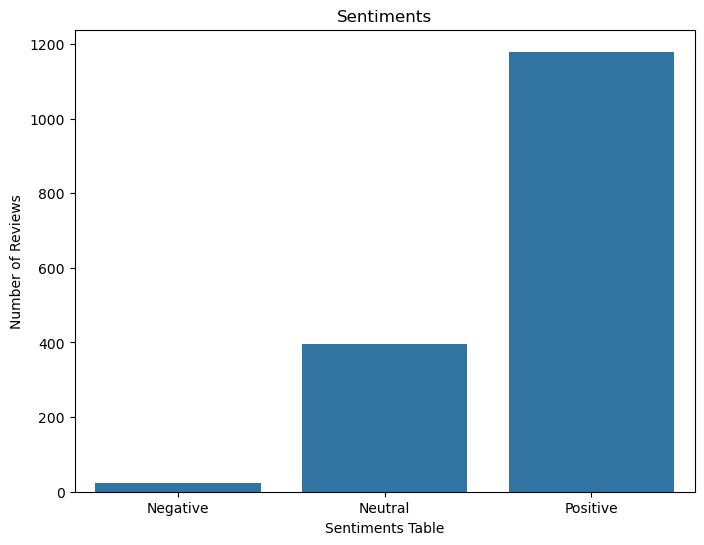

In [232]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiments')
plt.xlabel('Sentiments Table')
plt.ylabel('Number of Reviews')
plt.show()